<a href="https://colab.research.google.com/github/Manjunath727/DLwithTF/blob/master/NLP_Using_TF/W2/L2_subwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [2]:
#pip install tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 59.0MB/s 
     |████████████████████████████████| 3.1MB 46.4MB/s 
     |████████████████████████████████| 501kB 57.9MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

train_data, test_data = imdb['train'], imdb['test']


W0728 22:54:16.150509 140550387574656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


W0728 22:55:53.727666 140550387574656 dataset_builder.py:397] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [3]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [4]:
sample_string = 'Tensorflow from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string is {}'.format(original_string))


Tokenized string is [6307, 2327, 2934, 7961, 48, 4249, 4429, 7, 2652, 8050]
The original string is Tensorflow from basics to mastery


In [5]:
for ts in tokenized_string:
  print('{} --> {}'.format(ts, tokenizer.decode([ts])))

6307 --> Ten
2327 --> sor
2934 --> flow
7961 -->  
48 --> from 
4249 --> basi
4429 --> cs 
7 --> to 
2652 --> master
8050 --> y


In [6]:
# Build the model
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train the model
num_epochs = 10

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

W0728 23:13:44.376147 140550387574656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
25000/25000 [==============================] - 366s 15ms/step - loss: 0.6862 - accuracy: 0.5237 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 185s 7ms/step - loss: 0.6840 - accuracy: 0.5300 - val_loss: 0.6846 - val_accuracy: 0.5283
Epoch 3/10
25000/25000 [==============================] - 189s 8ms/step - loss: 0.6830 - accuracy: 0.5344 - val_loss: 0.6843 - val_accuracy: 0.5335
Epoch 4/10
25000/25000 [==============================] - 185s 7ms/step - loss: 0.6823 - accuracy: 0.5368 - val_loss: 0.6841 - val_accuracy: 0.5359
Epoch 5/10
25000/25000 [==============================] - 185s 7ms/step - loss: 0.6816 - accuracy: 0.5410 - val_loss: 0.6842 - val_accuracy: 0.5374
Epoch 6/10
25000/25000 [==============================] - 185s 7ms/step - loss: 0.6812 - accuracy: 0.5414 - val_loss: 0.6845 - val_accuracy: 0.5375
Epoch 7/10
25000/25000 [==============================] - 184s 7ms/step - loss: 0.6810 - accuracy: 0.54

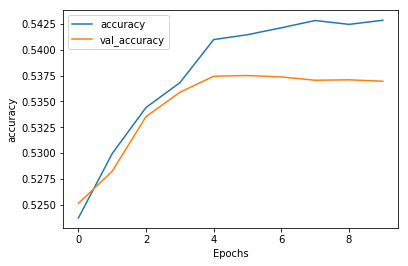

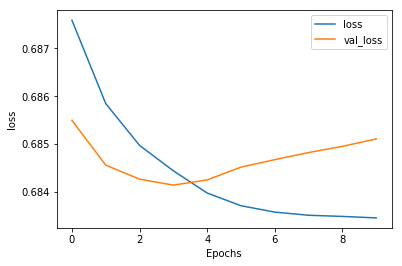

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')